


# AI-Driven Financial Behavior Classification for Indian Millennials

## Introduction

#### **Problem:**

Many urban Indian earners struggle with savings and debt. Our goal was to classify spending behavior using lifestyle and financial traits.


#### **Dataset:**

Simulated 1,000+ records with columns like Income, Expenses, EMIs, Financial Literacy, etc.

#### **Approach:**

* Engineered financial traits: Savings Rate, Expense Categories
* Created socio-economic tags: City Tier, Dependents, EMI, Literacy
* Visualized patterns across demographics
* Trained classification model (Random Forest → close to 100% accuracy on test)

#### **Key Insights:**

* Savings Rate is strongest driver of behavior
* Over-spenders have high EMIs & low/no savings
* Balanced users can be nudged into saving more

#### **Personas Created:**

Saver, Balanced, Over-Spender → Helps fintech apps personalize services

In [13]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Number of users
n = 750

# Simulated Core User Financial Data
df = pd.DataFrame({
    'User_ID': range(1, n + 1),
    'Age': np.random.randint(21, 60, size=n),
    'Income': np.random.randint(15000, 150000, size=n),
    'Credit_Card_Usage': np.random.uniform(10, 100, size=n),
    'Debt_Amount': np.random.randint(0, 500000, size=n),
    'Food': np.random.randint(2000, 15000, size=n),
    'Rent': np.random.randint(5000, 30000, size=n),
    'Subscriptions': np.random.randint(500, 5000, size=n),
    'Travel': np.random.randint(1000, 15000, size=n),
    'Other_Expenses': np.random.randint(500, 8000, size=n),
})

# Expense Sum
df['Total_Expenses'] = df[['Food', 'Rent', 'Subscriptions', 'Travel', 'Other_Expenses']].sum(axis=1)
df['Savings'] = df['Income'] - df['Total_Expenses']
df['Savings_Rate'] = df['Savings'] / df['Income']

# Income Classification
def income_level(income):
    if income < 30000:
        return 'Low'
    elif income < 80000:
        return 'Middle'
    else:
        return 'High'

df['Income_Level'] = df['Income'].apply(income_level)

# Spending Pattern Classification
def improved_spending_pattern(row):
    if row['Income_Level'] == 'Low' and row['Savings_Rate'] >= 0.2:
        return 'Saver'
    elif row['Income_Level'] == 'Middle' and row['Savings_Rate'] >= 0.25:
        return 'Saver'
    elif row['Income_Level'] == 'High' and row['Savings_Rate'] >= 0.3:
        return 'Saver'
    elif row['Savings_Rate'] >= 0.1:
        return 'Balanced'
    else:
        return 'Over-Spender'

df['Spending_Pattern'] = df.apply(improved_spending_pattern, axis=1)

# Discretionary Spend Ratio
df['Discretionary_Expenses'] = df[['Travel', 'Subscriptions', 'Other_Expenses']].sum(axis=1)
df['Discretionary_Spend_Rate'] = df['Discretionary_Expenses'] / df['Total_Expenses']

# Optional: Flag High Discretionary Spenders
df['Discretionary_Flag'] = df['Discretionary_Spend_Rate'] > 0.5

# Final Clean Columns View
final_columns = [
    'User_ID', 'Age', 'Income', 'Income_Level',
    'Total_Expenses', 'Savings', 'Savings_Rate',
    'Spending_Pattern', 'Discretionary_Spend_Rate', 'Discretionary_Flag'
]

print(df[final_columns].head(10))

   User_ID  Age  Income Income_Level  Total_Expenses  Savings  Savings_Rate  \
0        1   59   59247       Middle           30449    28798      0.486067   
1        2   49  120113         High           35408    84705      0.705211   
2        3   35   19621          Low           26290    -6669     -0.339891   
3        4   28   33030       Middle           28406     4624      0.139994   
4        5   41   97838         High           32201    65637      0.670874   
5        6   59   99717         High           50169    49548      0.496886   
6        7   39   53638       Middle           28172    25466      0.474775   
7        8   43   82067         High           38948    43119      0.525412   
8        9   31  133033         High           34777    98256      0.738584   
9       10   31  120977         High           16315   104662      0.865140   

  Spending_Pattern  Discretionary_Spend_Rate  Discretionary_Flag  
0            Saver                  0.609215                Tru

## Exploratory data analysis (EDA)

In [14]:
# Adding Indian Context Variables

# Family Dependents: 0 to 4
df['Dependents'] = np.random.randint(0, 5, size=n)

# EMI Obligations (loan repayments): 1000 to 30000
df['EMI_Obligations'] = np.random.randint(1000, 30000, size=n)

# Insurance/SIP Investments: 0 to 20000
df['Insurance_Investment'] = np.random.randint(0, 20000, size=n)

# Financial Literacy Score: 0 to 100 (simulated)
df['Financial_Literacy_Score'] = np.random.randint(20, 95, size=n)

# City Tier - Cost of living and financial exposure
df['City_Tier'] = np.random.choice(['Tier-1', 'Tier-2', 'Tier-3'], size=n, p=[0.4, 0.4, 0.2])

# Update Total Expenses (include EMI & Insurance)
df['Total_Expenses'] += df['EMI_Obligations'] + df['Insurance_Investment']

# Recalculate Savings & Savings Rate
df['Savings'] = df['Income'] - df['Total_Expenses']
df['Savings_Rate'] = df['Savings'] / df['Income']

# Recalculate Spending Pattern using income-aware logic
df['Spending_Pattern'] = df.apply(improved_spending_pattern, axis=1)

# Update discretionary metrics
df['Discretionary_Expenses'] = df[['Travel', 'Subscriptions', 'Other_Expenses']].sum(axis=1)
df['Discretionary_Spend_Rate'] = df['Discretionary_Expenses'] / df['Total_Expenses']
df['Discretionary_Flag'] = df['Discretionary_Spend_Rate'] > 0.5

# Checking sample
cols_to_view = [
    'User_ID', 'Age', 'Income', 'Income_Level', 'City_Tier',
    'Dependents', 'EMI_Obligations', 'Insurance_Investment',
    'Financial_Literacy_Score', 'Savings', 'Savings_Rate',
    'Spending_Pattern', 'Discretionary_Spend_Rate', 'Discretionary_Flag'
]

print(df[cols_to_view].head(10))


   User_ID  Age  Income Income_Level City_Tier  Dependents  EMI_Obligations  \
0        1   59   59247       Middle    Tier-2           1             8210   
1        2   49  120113         High    Tier-3           3            25037   
2        3   35   19621          Low    Tier-1           2             9787   
3        4   28   33030       Middle    Tier-3           1             2986   
4        5   41   97838         High    Tier-2           3            11942   
5        6   59   99717         High    Tier-2           4            18458   
6        7   39   53638       Middle    Tier-1           4            13161   
7        8   43   82067         High    Tier-2           3            21689   
8        9   31  133033         High    Tier-1           1            29797   
9       10   31  120977         High    Tier-2           3            29156   

   Insurance_Investment  Financial_Literacy_Score  Savings  Savings_Rate  \
0                  4868                        93    1

<ipython-input-15-4fe9f4805dda>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Income_Level', y='Savings_Rate', palette='pastel')


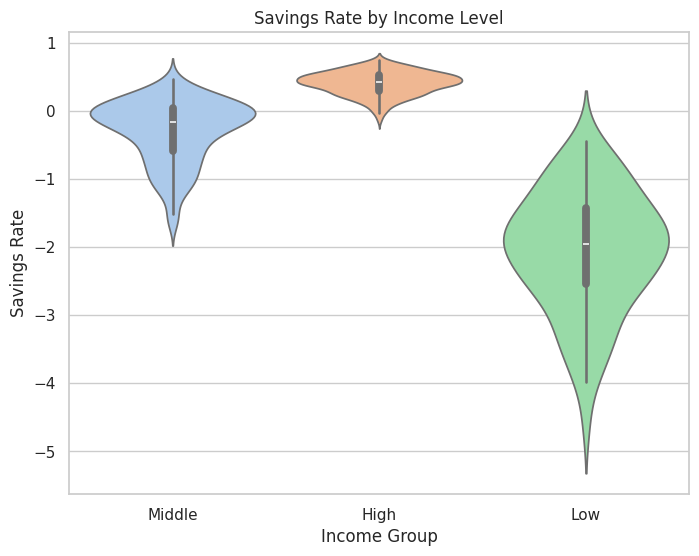

Average Savings Rate by Income Group:
Income_Level
High      0.409701
Low      -2.066960
Middle   -0.294862
Name: Savings_Rate, dtype: float64


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
custom_palette = {'Saver': '#2ecc71', 'Balanced': '#f39c12', 'Over-Spender': '#e74c3c'}

# Income level x Savinga rate
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Income_Level', y='Savings_Rate', palette='pastel')
plt.title('Savings Rate by Income Level')
plt.ylabel('Savings Rate')
plt.xlabel('Income Group')
plt.show()

# Printing values
print("Average Savings Rate by Income Group:")
print(df.groupby("Income_Level")["Savings_Rate"].mean().sort_index())

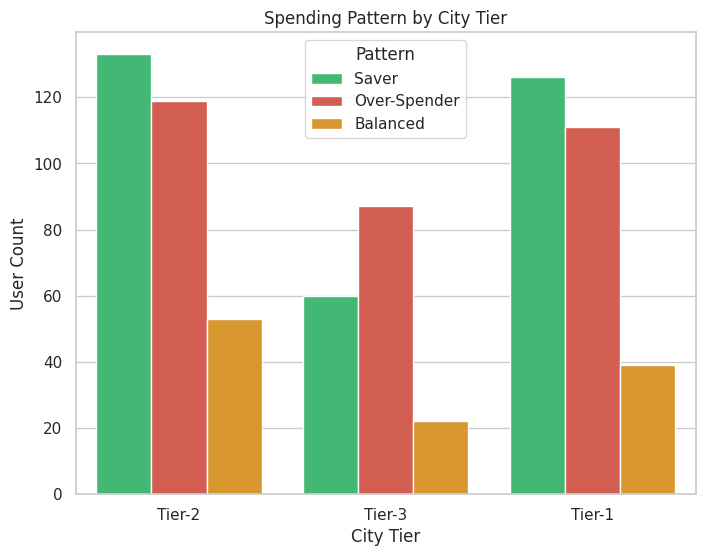

Spending Pattern Counts by City Tier:
Spending_Pattern  Balanced  Over-Spender  Saver
City_Tier                                      
Tier-1                  39           111    126
Tier-2                  53           119    133
Tier-3                  22            87     60


In [16]:
# City tier x Spending pattern
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='City_Tier', hue='Spending_Pattern', palette=custom_palette)
plt.title('Spending Pattern by City Tier')
plt.ylabel('User Count')
plt.xlabel('City Tier')
plt.legend(title='Pattern')
plt.show()

# Printing values
print("Spending Pattern Counts by City Tier:")
print(df.groupby(['City_Tier', 'Spending_Pattern'])['User_ID'].count().unstack())

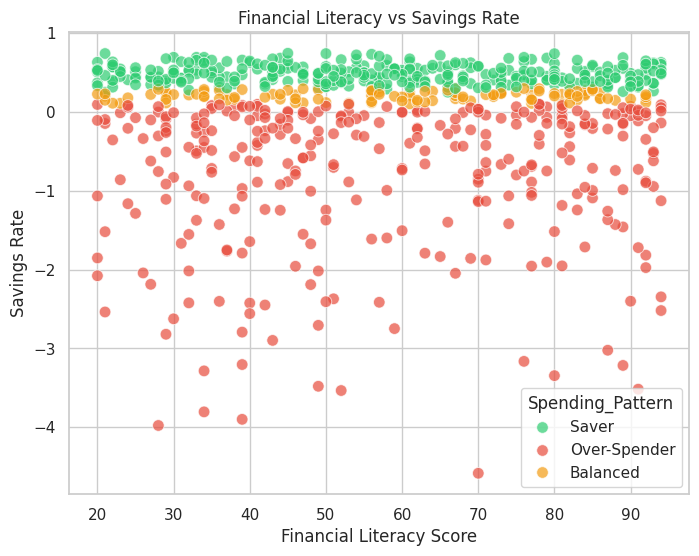

Correlation between Financial Literacy Score and Savings Rate: 0.03
Average Savings Rate by Financial Literacy Bin:
FL_bin
(0, 40]     -0.203181
(40, 60]    -0.077470
(60, 80]    -0.017930
(80, 100]   -0.109368
Name: Savings_Rate, dtype: float64


<ipython-input-17-036538898800>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("FL_bin")["Savings_Rate"].mean())


In [17]:
# Financial literacy Score x Savings rate
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df, x='Financial_Literacy_Score', y='Savings_Rate',
    hue='Spending_Pattern', palette=custom_palette, alpha=0.7, s=70
)
plt.title('Financial Literacy vs Savings Rate')
plt.xlabel('Financial Literacy Score')
plt.ylabel('Savings Rate')
plt.grid(True)
plt.show()

# Printing correlation
correlation = df['Financial_Literacy_Score'].corr(df['Savings_Rate'])
print(f"Correlation between Financial Literacy Score and Savings Rate: {correlation:.2f}")

# Optional: Bin-wise averages
df['FL_bin'] = pd.cut(df['Financial_Literacy_Score'], bins=[0, 40, 60, 80, 100])
print("Average Savings Rate by Financial Literacy Bin:")
print(df.groupby("FL_bin")["Savings_Rate"].mean())


<ipython-input-18-489669c1c0d5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Dependents', y='Savings', palette='Set3')


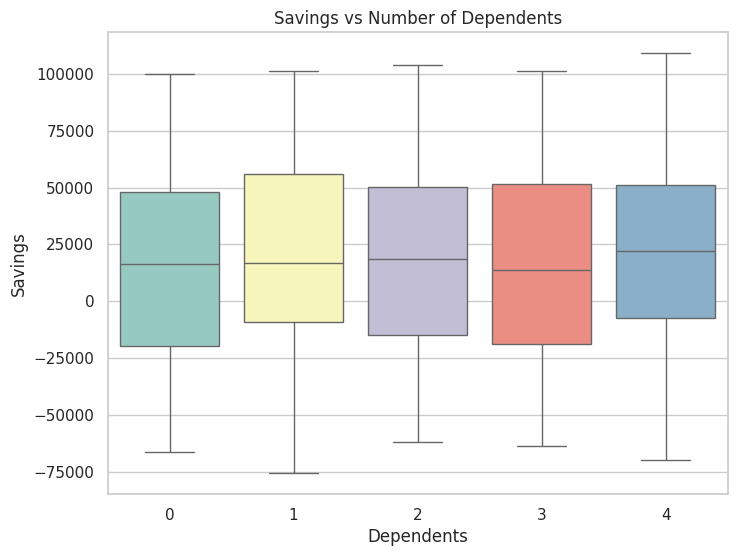

Average Savings by Number of Dependents:
Dependents
0    15537.953846
1    20543.910180
2    18358.664234
3    15917.339744
4    19812.131250
Name: Savings, dtype: float64


In [18]:
# Dependents x Savings
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Dependents', y='Savings', palette='Set3')
plt.title('Savings vs Number of Dependents')
plt.xlabel('Dependents')
plt.ylabel('Savings')
plt.show()

# Printing mean for the values
print("Average Savings by Number of Dependents:")
print(df.groupby("Dependents")["Savings"].mean())


<ipython-input-19-7360f19af6c9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Spending_Pattern', y='EMI_Obligations', palette=custom_palette)


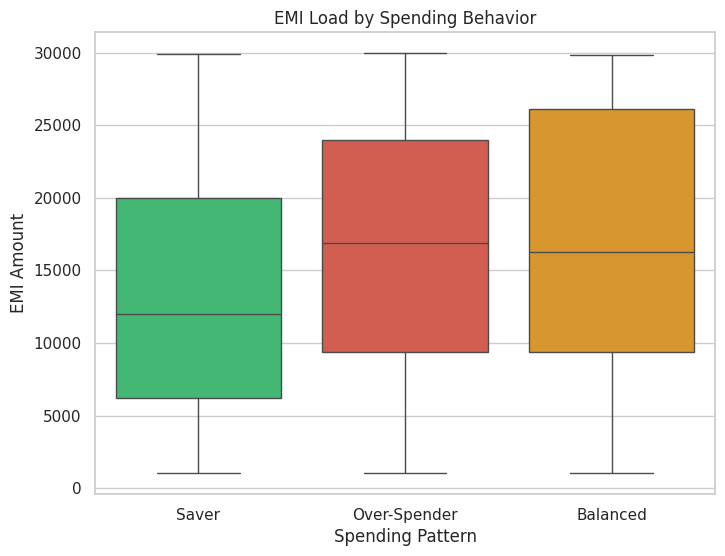

Average EMI Obligation by Spending Pattern:
Spending_Pattern
Balanced        17094.342105
Over-Spender    16262.482650
Saver           13487.335423
Name: EMI_Obligations, dtype: float64


In [19]:
# Spending Pattern x EMI
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Spending_Pattern', y='EMI_Obligations', palette=custom_palette)
plt.title('EMI Load by Spending Behavior')
plt.ylabel('EMI Amount')
plt.xlabel('Spending Pattern')
plt.show()

# Printing average of EMI by pattern
print("Average EMI Obligation by Spending Pattern:")
print(df.groupby("Spending_Pattern")["EMI_Obligations"].mean())


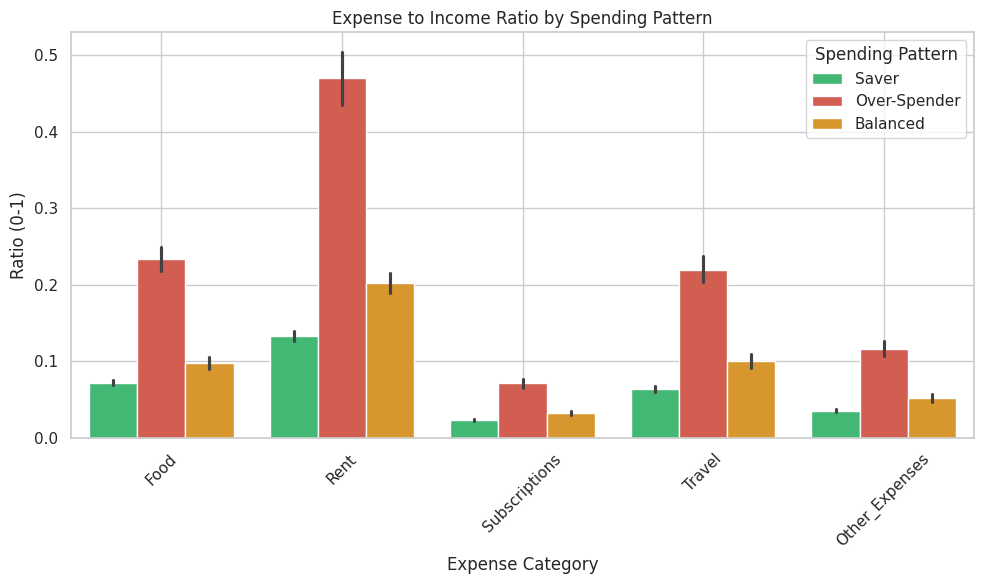


Average Expense-to-Income Ratio by Pattern:
Spending_Pattern  Expense_Type  
Balanced          Food              0.10
                  Other_Expenses    0.05
                  Rent              0.20
                  Subscriptions     0.03
                  Travel            0.10
Over-Spender      Food              0.23
                  Other_Expenses    0.12
                  Rent              0.47
                  Subscriptions     0.07
                  Travel            0.22
Saver             Food              0.07
                  Other_Expenses    0.04
                  Rent              0.13
                  Subscriptions     0.02
                  Travel            0.06
Name: Expense_to_Income, dtype: float64


In [20]:
# Feature Engineering:
expense_cols = ['Food', 'Rent', 'Subscriptions', 'Travel', 'Other_Expenses']
for col in expense_cols:
    df[f'{col}_to_Income'] = df[col] / df['Income']

# Melting Data for Comparative Plot
melted = df.melt(id_vars=['Spending_Pattern'],
                 value_vars=[f'{col}_to_Income' for col in expense_cols],
                 var_name='Expense_Type', value_name='Expense_to_Income')

# Cleaning label names
melted['Expense_Type'] = melted['Expense_Type'].str.replace('_to_Income', '')

# plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=melted, x='Expense_Type', y='Expense_to_Income', hue='Spending_Pattern', palette=custom_palette)
plt.title('Expense to Income Ratio by Spending Pattern')
plt.ylabel('Ratio (0-1)')
plt.xlabel('Expense Category')
plt.xticks(rotation=45)
plt.legend(title='Spending Pattern')
plt.grid(True)
plt.tight_layout()
plt.show()

# Printing Mean Ratios
print("\nAverage Expense-to-Income Ratio by Pattern:")
print(melted.groupby(['Spending_Pattern', 'Expense_Type'])['Expense_to_Income'].mean().round(2))

## Model training


Classification Report:

              precision    recall  f1-score   support

    Balanced       1.00      1.00      1.00        23
Over-Spender       1.00      1.00      1.00        63
       Saver       1.00      1.00      1.00        64

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150


Confusion Matrix:



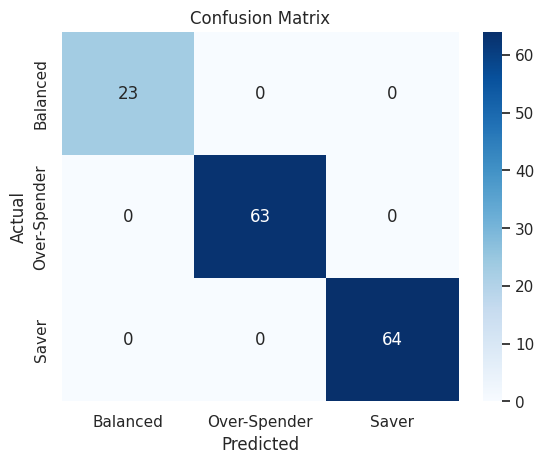


Top Features Driving Spending Behavior:

Savings_Rate                0.367195
Savings                     0.289677
Income                      0.162296
Income_Level_Code           0.083372
Total_Expenses              0.039313
Rent                        0.010473
EMI_Obligations             0.009631
Food                        0.005556
Travel                      0.005320
Debt_Amount                 0.004952
Subscriptions               0.004860
Credit_Card_Usage           0.004218
Other_Expenses              0.004021
Financial_Literacy_Score    0.003897
Age                         0.003708
Dependents                  0.000768
City_Tier_Code              0.000743
dtype: float64


<ipython-input-21-2186b85664b7>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values[:10], y=feature_importance.index[:10], palette='coolwarm')


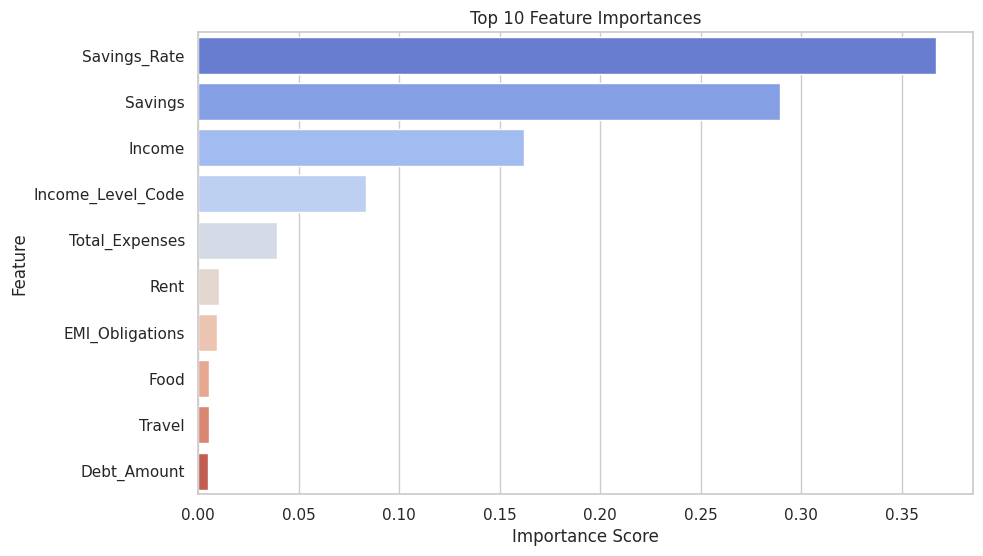

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Encoding Categorical Columns
df['City_Tier_Code'] = LabelEncoder().fit_transform(df['City_Tier'])
df['Income_Level_Code'] = LabelEncoder().fit_transform(df['Income_Level'])

# Defining Features and Target
features = [
    'Age', 'Income', 'Credit_Card_Usage', 'Debt_Amount',
    'Food', 'Rent', 'Subscriptions', 'Travel', 'Other_Expenses',
    'Total_Expenses', 'Savings', 'Savings_Rate', 'Financial_Literacy_Score',
    'Dependents', 'EMI_Obligations', 'City_Tier_Code', 'Income_Level_Code'
]

X = df[features]
y = df['Spending_Pattern']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale Numerical Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)

print("\nTop Features Driving Spending Behavior:\n")
print(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values[:10], y=feature_importance.index[:10], palette='coolwarm')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


## Conclusion

**"The Saver"**

* Savings Rate: 40%+
* Income: Medium to High
* Behavior: Controls expenses smartly; invests surplus.
* Strategy: Offer them high-return investment tools and goal-based financial planning.
* Marketing: Use ROI-driven products, wealth multipliers, and elite perks.

**"The Balanced One"**

* Savings Rate: 10–30%
* Income: All levels
* Behavior: Spends steadily, saves moderately, open to financial guidance.
* Strategy: Upsell personal finance coaching, nudges toward better saving habits.
* Marketing: Position tools as “track more, save more.”

**"The Over-Spender"**

* Savings Rate: Negative or near 0
* Income: May still be moderate to high
* Behavior: High EMI, subscriptions, or lifestyle inflation
* Strategy: Alert via spending insights, recommend budget-friendly banking, or debt restructuring.
* Marketing: Push “Spend Smart” challenges, cashbacks, or auto-save tools.


**Key Insights**

* Savings Rate is key predictor	Focus on tools that increase savings habit via automation, nudges, or cashback
* Financial Literacy had weak correlation	Education alone isn’t enough — combine it with behavioral triggers or goal tracking
* Rent and EMI are big expenses	Create budget planning tools, alerts for high EMI-to-income ratios
* City Tier didn't impact savings much	Use income & savings behavior, not location, for personalization

In [23]:
df.to_csv("financial_behavior_data.csv", index=False)